In [3]:
# From https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb#scrollTo=cPMCaxrZwp7t

#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)



module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [5]:
def plot_similarity(labels, features, rotation):
  
  for i in range(len(labels)):
    labels[i] = (labels[i][:20] + '..') if len(labels[i]) > 22 else labels[i]
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

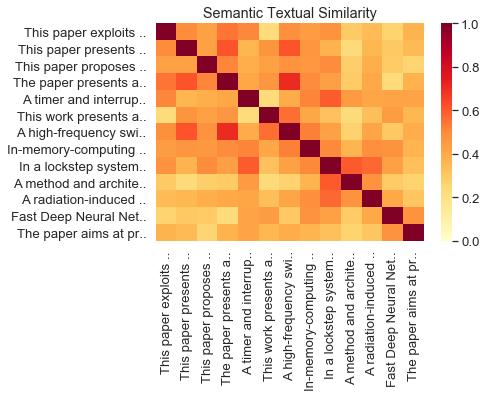

In [6]:
import glob
filecontents=[]
for w in glob.glob("./*.txt"):
    with open(w, 'r') as file:
        filecontents.append( file.read().replace('\n', ''))
    
run_and_plot(filecontents)
    

In [14]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy as sch
import time
def cluster_corr(corr_array, inplace=False):
    #print ("cluster_corr")
    #print (corr_array)
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to each other 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='single')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
##    print ("Orden final de filas y columnas")
##    print (idx)
    if not inplace:
        corr_array = corr_array.copy()
        
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

In [16]:
message_embeddings_ = embed(filecontents)
matrix=np.inner(message_embeddings_,message_embeddings_)

In [18]:
newmatrix=cluster_corr(matrix,False)

Text(0.5, 1, 'Semantic Textual Similarity')

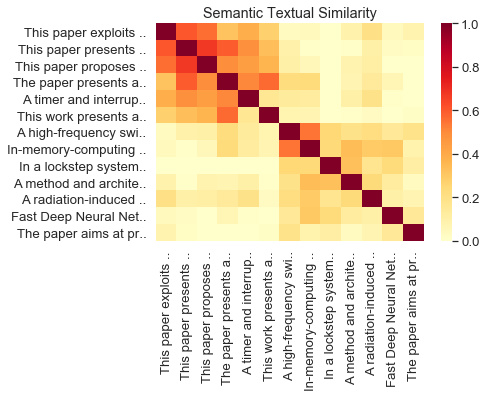

In [23]:
labels=filecontents
for i in range(len(labels)):
    labels[i] = (labels[i][:20] + '..') if len(labels[i]) > 22 else labels[i]
sns.set(font_scale=1.2)
g = sns.heatmap(
      newmatrix,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
g.set_xticklabels(labels, rotation=90)
g.set_title("Semantic Textual Similarity")